## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
m_data = mouse_metadata.merge(study_results, on = "Mouse ID")

# Display the data table for preview
m_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = m_data["Mouse ID"].nunique()
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = m_data.loc[m_data.duplicated(subset = ["Mouse ID","Timepoint"],keep = False) == True]
duplicate_df= duplicate_df["Mouse ID"].drop_duplicates()
duplicate_df = pd.DataFrame(duplicate_df)
duplicate_df

,Mouse ID
908,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

kept_duplicates = pd.DataFrame(duplicate_df)
duplicates = kept_duplicates.merge(m_data, on = "Mouse ID")
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = m_data.copy()
clean_data = clean_data.loc[~(clean_data["Mouse ID"].isin(duplicate_df["Mouse ID"]))]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

mice_no_dupes = clean_data["Mouse ID"].nunique()
mice_no_dupes

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = round(clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],3)
mean = mean.reset_index()
mean = mean.rename(columns={"Tumor Volume (mm3)":"Mean"})

median = round(clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],3)
median = median.reset_index()
median = median.rename(columns={"Tumor Volume (mm3)":"Median"})

var = round(clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],3)
var = var.reset_index()
var = var.rename(columns={"Tumor Volume (mm3)":"Variance"})

std = round(clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],3)
std = std.reset_index()
std = std.rename(columns={"Tumor Volume (mm3)":"STD"})

sem = round(clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],3)
sem = sem.reset_index()
sem = sem.rename(columns={"Tumor Volume (mm3)":"SEM"})


dataframe = [mean,median,var,std,sem]

summary_df = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'], how='inner'), dataframe)
summary_df

,Drug Regimen,Mean,Median,Variance,STD,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.321,50.446,43.852,6.622,0.544
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

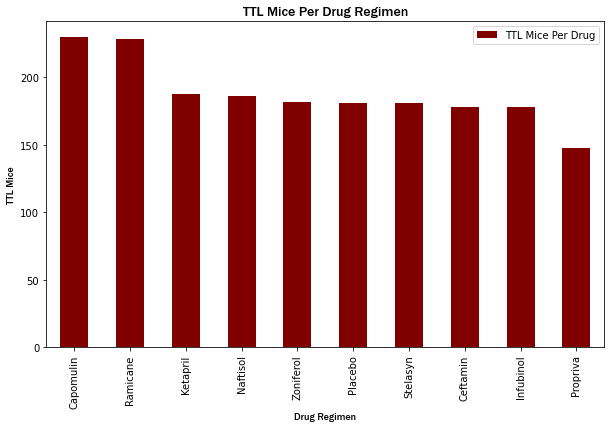

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

plt.figure(figsize=(10,6))
plt.title("TTL Mice Per Drug Regimen", fontsize=14, fontname="Franklin Gothic Medium")
plt.xlabel("Drug Regimen", fontsize=10, fontname="Franklin Gothic Medium")
plt.ylabel("TTL Mice", fontsize=10, fontname="Franklin Gothic Medium")
mouseplt =clean_data["Drug Regimen"].value_counts()

mouseplt.plot(kind="bar",x="Drug Regimen", y="Value Counts",label="TTL Mice Per Drug", color="maroon")
plt.legend()
plt.show()

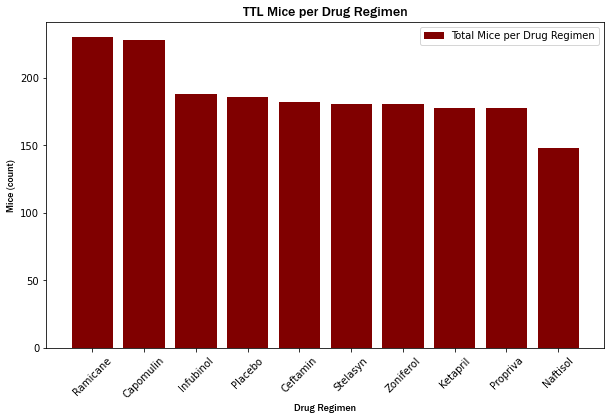

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

myplt = clean_data["Drug Regimen"].unique()
myplt

plt.figure(figsize=(10,6))
plt.title("TTL Mice per Drug Regimen", fontsize=14, fontname="Franklin Gothic Medium")
plt.xlabel("Drug Regimen", fontsize=10, fontname="Franklin Gothic Medium")
plt.ylabel("Mice (count)", fontsize=10, fontname="Franklin Gothic Medium")
plt.bar(myplt, height=(mouseplt), label="Total Mice per Drug Regimen", color="maroon")
plt.xticks(rotation=45)
plt.legend()
plt.show()

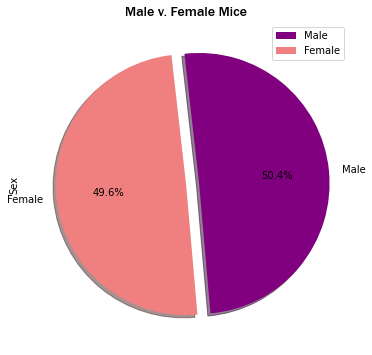

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_data = clean_data.drop_duplicates(subset=["Mouse ID"])
mf_data = mf_data["Sex"].value_counts()
colors = ["purple", "lightcoral"]
labels = ["Male", "Female"]
explode = (0.1, 0)

plt.figure(figsize=(10,6))
plt.title("Male v. Female Mice", fontsize=14, fontname="Franklin Gothic Medium")
mf_data.plot.pie(colors=colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=275, shadow=True)
plt.legend()
plt.show()

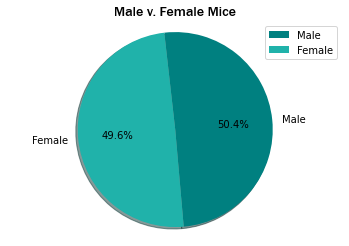

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = mf_data
colors = ["teal", "lightseagreen"]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
plt.title("Male v. Female Mice", fontsize=14, fontname="Franklin Gothic Medium")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=275, shadow=True, colors=colors)
ax1.axis('equal') 
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

sorted_df = clean_data.sort_values(by='Timepoint', ascending=False)
sorted_df = sorted_df.drop_duplicates(subset=["Mouse ID"])
druglist = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

sorted_df = sorted_df.loc[(sorted_df["Drug Regimen"].isin(druglist))]
sorted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

treatments = sorted_df["Drug Regimen"].unique().tolist()

tumor_vol = []
    
for i, treatment in enumerate(treatments):
    filtered_df = sorted_df.loc[(sorted_df["Drug Regimen"] == treatment)]
    tumor_vol.append(filtered_df[["Mouse ID","Drug Regimen",'Tumor Volume (mm3)']])
    Q1 = filtered_df['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = filtered_df['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - (1.5 * IQR),4)
    upper_bound = round(Q3 + (1.5 * IQR),4)
    print(f"Values below {lower_bound} and above {upper_bound} would be considered outliers")
    

Values below 20.7046 and above 51.832 would be considered outliers
Values below 25.3554 and above 87.6665 would be considered outliers
Values below 17.9127 and above 54.3068 would be considered outliers
Values below 36.8329 and above 82.7414 would be considered outliers


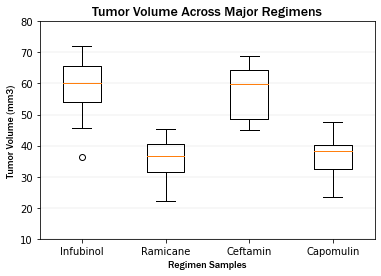

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

per_regime = pd.DataFrame(tumor_vol[0])
per_regime = per_regime.append(pd.DataFrame(tumor_vol[1]))
per_regime = per_regime.append(pd.DataFrame(tumor_vol[2]))
per_regime = per_regime.append(pd.DataFrame(tumor_vol[3]))

drug_v_TTL = per_regime.reset_index() 
drug_v_TTL = per_regime[["Drug Regimen","Tumor Volume (mm3)"]] 

in_drug = drug_v_TTL.loc[drug_v_TTL["Drug Regimen"] == "Infubinol"]
in_drug = in_drug.reset_index()
in_drug_series = in_drug["Tumor Volume (mm3)"]
in_drug_series = pd.Series(in_drug_series)

ram_drug = drug_v_TTL.loc[drug_v_TTL["Drug Regimen"] == "Ramicane"]
ram_drug = ram_drug.reset_index()
ram_drug_series = ram_drug["Tumor Volume (mm3)"]
ram_drug_series = pd.Series(ram_drug_series)

cef_drug = drug_v_TTL.loc[drug_v_TTL["Drug Regimen"] == "Ceftamin"]
cef_drug = cef_drug.reset_index()
cef_drug_series = cef_drug["Tumor Volume (mm3)"]
cef_drug_series = pd.Series(cef_drug_series)

cap_drug = drug_v_TTL.loc[drug_v_TTL["Drug Regimen"] == "Capomulin"]
cap_drug = cap_drug.reset_index()
cap_drug_series = cap_drug["Tumor Volume (mm3)"]
cap_drug_series = pd.Series(cap_drug_series)

#plot all series on same plot
data = [in_drug_series,ram_drug_series,cef_drug_series,cap_drug_series]
fig4, ax4 = plt.subplots()
ax4.set_title('Tumor Volume Across Major Regimens', fontsize=14, fontname="Franklin Gothic Medium")
plt.xlabel("Regimen Samples", fontsize=10, fontname="Franklin Gothic Medium")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontname="Franklin Gothic Medium")
plt.ylim(10,80)

ax4.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Infubinol', 'Ramicane', 'Ceftamin','Capomulin'])
ax4.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

## Line and Scatter Plots

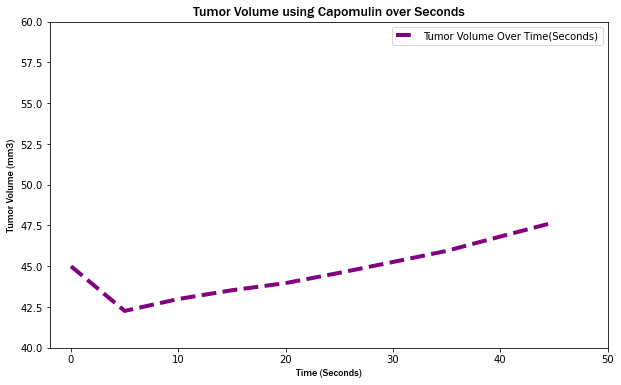

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mice_cap = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mouse_cap = clean_data.loc[clean_data["Mouse ID"] == "i557"]

plt.figure(figsize=(10,6))
plt.title("Tumor Volume using Capomulin over Seconds", fontsize=14, fontname="Franklin Gothic Medium")
plt.xlabel("Time (Seconds)", fontsize=10, fontname="Franklin Gothic Medium")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontname="Franklin Gothic Medium")
plt.ylim(40,60)
plt.xlim(-2,50)
plt.plot(mouse_cap["Timepoint"], mouse_cap["Tumor Volume (mm3)"] ,color="purple", label="Tumor Volume Over Time(Seconds)", linestyle='dashed',linewidth=4 )
plt.legend()
plt.show()

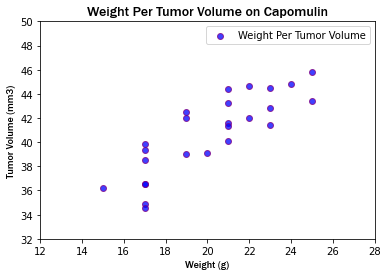

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_vol = mice_cap.groupby("Mouse ID").mean()

x_axis = avg_tumor_vol["Weight (g)"]
y_axis = avg_tumor_vol["Tumor Volume (mm3)"]

plt.title("Weight Per Tumor Volume on Capomulin", fontsize=14, fontname="Franklin Gothic Medium")
plt.xlabel("Weight (g)", fontsize=10, fontname="Franklin Gothic Medium")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontname="Franklin Gothic Medium")
plt.ylim(32,50)
plt.xlim(12,28)

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="purple",  alpha=0.75, label="Weight Per Tumor Volume")
plt.legend()
plt.plot()
plt.show()

## corr and Regression

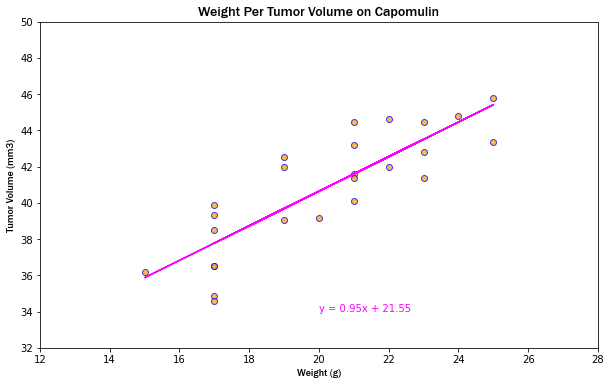

In [18]:
# Calculate the corr coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(x_axis, y_axis)
rounded_corr = round(corr[0],4)
rounded_corr

plt.figure(figsize=(10,6))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Weight Per Tumor Volume on Capomulin", fontsize=14, fontname="Franklin Gothic Medium")

plt.annotate(line_eq,(20,34),fontsize=10,color="magenta")
plt.xlabel("Weight (g)",fontsize=10, fontname="Franklin Gothic Medium")
plt.ylabel("Tumor Volume (mm3)",fontsize=10, fontname="Franklin Gothic Medium")
plt.scatter(x_axis,y_axis, marker="o", facecolors="orange", edgecolors="blue",  alpha=0.75,)
plt.plot(x_axis,regress_values,"r-",color="magenta")
plt.ylim(32,50)
plt.xlim(12,28)
plt.show()